# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import os
import glob
import shutil

In [25]:
os.chdir('/content/drive/MyDrive/data')

In [26]:
### Guideline for convenience ###
# 압축 풀기
!unzip -qq "animals10.zip"

In [27]:
os.chdir('/content/drive/MyDrive/data/Animals-10')
!ls

butterfly  cat	chicken  cow  dog  elephant  horse  sheep  spider  squirrel


In [28]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?

animal_class = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
class_no = []

for i in range(10):
    current_class = animal_class[i]
    temp = sorted(glob.glob('./{0}/*.*'.format(current_class)))
    class_no.append(int(len(temp)))
    print(len(temp))

2112
1668
3098
1866
4863
1446
2623
1820
4821
1862


In [29]:
# test에 넣을 이미지 개수 계산
test_no = []
for i in range(len(class_no)):
    test_no.append(round(class_no[i]*0.3))

test_no

[634, 500, 929, 560, 1459, 434, 787, 546, 1446, 559]

In [30]:
import random

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [31]:
os.chdir('/content/drive/MyDrive/data')
!pwd

/content/drive/MyDrive/data


In [32]:
# train, test 폴더 경로 선언 & 만들기
# 폴더 경로 선언 & 만들기

for name in animal_class:
    os.makedirs('./train/{0}'.format(name), exist_ok=True)
    os.makedirs('./test/{0}'.format(name), exist_ok=True)

In [33]:
sorted(glob.glob('/content/drive/MyDrive/data/Animals-10/{0}/*.*'.format(animal_class[0])))[:5]

['/content/drive/MyDrive/data/Animals-10/butterfly/butterfly (1).jpeg',
 '/content/drive/MyDrive/data/Animals-10/butterfly/butterfly (1).jpg',
 '/content/drive/MyDrive/data/Animals-10/butterfly/butterfly (1).png',
 '/content/drive/MyDrive/data/Animals-10/butterfly/butterfly (10).jpeg',
 '/content/drive/MyDrive/data/Animals-10/butterfly/butterfly (10).jpg']

In [34]:
# train, test 폴더로 이미지 split해서 알맞게 집어넣기

for i in range(10):
    split(sorted(glob.glob('/content/drive/MyDrive/data/Animals-10/{0}/*.*'.format(animal_class[i]))),
          test_no[i], '/content/drive/MyDrive/data/train/{0}'.format(animal_class[i]),
          '/content/drive/MyDrive/data/test/{0}'.format(animal_class[i]))

train 폴더 이미지 개수 : 1478
test 폴더 이미지 개수 : 634
train 폴더 이미지 개수 : 1168
test 폴더 이미지 개수 : 500
train 폴더 이미지 개수 : 2169
test 폴더 이미지 개수 : 929
train 폴더 이미지 개수 : 1306
test 폴더 이미지 개수 : 560
train 폴더 이미지 개수 : 3404
test 폴더 이미지 개수 : 1459
train 폴더 이미지 개수 : 1012
test 폴더 이미지 개수 : 434
train 폴더 이미지 개수 : 1836
test 폴더 이미지 개수 : 787
train 폴더 이미지 개수 : 1274
test 폴더 이미지 개수 : 546
train 폴더 이미지 개수 : 3375
test 폴더 이미지 개수 : 1446
train 폴더 이미지 개수 : 1303
test 폴더 이미지 개수 : 559


# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [35]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np

In [41]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!

transform_train = transforms.Compose([
    transforms.ColorJitter(brightness=0.3),
    transforms.RandomRotation(25),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

transform_test = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [42]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언

train_data = torchvision.datasets.ImageFolder(
    root = '/content/drive/MyDrive/data/train', # 바로 train 폴더 지정
    transform = transform_train 
)
test_data = torchvision.datasets.ImageFolder(
    root = '/content/drive/MyDrive/data/test',
    transform = transform_test
)

In [43]:
print(len(train_data), len(test_data), train_data[0][0].shape)

18325 7854 torch.Size([3, 32, 32])


In [39]:
def imshow_loader(img):
    img = img * 0.225 + 0.456 # 정확한 값은 아니지만 대강 normalize 반대로
    img_np = np.array(img)
    imshow(np.transpose(img_np, (1,2,0)))
    plt.show()

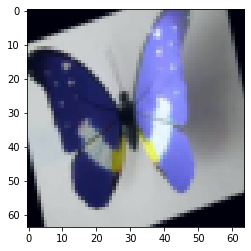

In [63]:
imshow_loader(train_data[0][0])

In [45]:
# train, test에 대해 DataLoader 정의
trainloader = torch.utils.data.DataLoader(
    train_data,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=True,         # train dataloader는 epoch마다 데이터 다시 섞어서 batch 만들고 학습! - 학습 효율 up
    num_workers=2
)

testloader = torch.utils.data.DataLoader(
    test_data,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=False,        # test dataloader는 데이터 매번 섞을 이유가 없음 - 어차피 확인 용도
    num_workers=2
)

In [46]:

import torch.nn as nn


animal_class = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']

In [47]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?

our_class = tuple(animal_class)

#### 모델 정의 시 유념해야할 건 각 층의 결과물의 차원!
#### 모델이 복잡해지면 복잡해질수록 이는 더욱 중요해지므로 레이어별로 도출되는 데이터의 크기를 써넣는 것을 추천 (안맞으면 에러남)
# (해당 모델은 임의로 만든 모델로 성능을 보장하지 X)

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        self.layer = nn.Sequential(
            # 맨처음 RGB 채널 3개이므로 가장 처음 in_channels = 3
            # img의 가장 첫 차원이 batch_size 값은 계속해서 유지
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),  # [batch_size,3,32,32] -> [batch_size,16,32,32] -> same with? - using 16 filters
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1), # [batch_size,16,32,32] -> [batch_size,32,32,32]
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(0.30),
            nn.MaxPool2d(kernel_size=2, stride=2),                                # [batch_size,32,32,32] -> [batch_size,32,16,16]
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1), # [batch_size,32,16,16] -> [batch_size,32,16,16]
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(0.20),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1), # [batch_size,32,16,16] -> [batch_size,64,16,16]
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(0.25),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1), # [batch_size,64,16,16] -> [batch_size,64,16,16]
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2)                                 # [batch_size,64,16,16] -> [batch_size,64,8,8]
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(32*8*8,100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = out.view(out.size(0),-1)  # FC layer에 들어가기전, flatten! - view 함수 활용
                                        # 가장 첫 차원인 batch_size는 유지하고 나머지 차원들을 하나로 합치기 - [batch_size,16,5,5] -> [batch_size,16*5*5]
        out = self.fc_layer(out)
        return out

In [48]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기
# !pip install torchsummary

from torchsummary import summary
test_model = MyModel().to(device) # 모델 객체 선언
summary(test_model, (3,32,32), batch_size=16)         # Recall) Tensor는 C, H, W 순서로 이미지 가짐

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [16, 16, 32, 32]             448
              ReLU-2           [16, 16, 32, 32]               0
       BatchNorm2d-3           [16, 16, 32, 32]              32
            Conv2d-4           [16, 16, 32, 32]           2,320
              ReLU-5           [16, 16, 32, 32]               0
       BatchNorm2d-6           [16, 16, 32, 32]              32
           Dropout-7           [16, 16, 32, 32]               0
         MaxPool2d-8           [16, 16, 16, 16]               0
            Conv2d-9           [16, 32, 16, 16]           4,640
             ReLU-10           [16, 32, 16, 16]               0
      BatchNorm2d-11           [16, 32, 16, 16]              64
          Dropout-12           [16, 32, 16, 16]               0
           Conv2d-13           [16, 32, 16, 16]           9,248
             ReLU-14           [16, 32,

In [49]:
# Device 선언 (GPU 권장)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [50]:
# 모델 객체 선언
mymodel = MyModel().to(device)
mymodel

MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.3, inplace=False)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.2, inplace=False)
    (12): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.25, inplace=False)
    (16): Conv2d(32, 32, kernel_size=(3, 

In [51]:
# loss func, optimizer 정의
criterion = nn.CrossEntropyLoss().to(device) # criterion (loss func)도 device 위에서
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001, weight_decay=0.0001) # 보통 Adam의 learning rate로 0.001 사용
                                                                                  # weight_decay = L2 Regularization의 lambda값 (가중치 제한 정도)

In [52]:
# train 함수 정의
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 300 == 299:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 300 batches: {running_loss / 300}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [53]:
# test 함수 정의
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

In [54]:
# training

num_epoch = 15

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)

# model 저장! - parameter값 저장
torch.save(mymodel.state_dict(), '/content/drive/MyDrive/data/mymodel_animals.pt')
print('Model Saved!')


[ Train epoch: 1 ]

Current batch: 300
Average train loss of recent 300 batches: 1.9321231842041016

Total train accuarcy: 36.36016371077763
Total train loss: 1.8142867406625398

[ Test epoch: 1 ]

Test accuarcy: 47.03335879806468
Test average loss: 1.5854518951439276

[ Train epoch: 2 ]

Current batch: 300
Average train loss of recent 300 batches: 1.5534663152694703

Total train accuarcy: 47.43792633015007
Total train loss: 1.5139720591783108

[ Test epoch: 2 ]

Test accuarcy: 50.85306850012732
Test average loss: 1.4290000149389592

[ Train epoch: 3 ]

Current batch: 300
Average train loss of recent 300 batches: 1.4088027350107828

Total train accuarcy: 52.24010914051842
Total train loss: 1.3846926043170908

[ Test epoch: 3 ]

Test accuarcy: 54.112554112554115
Test average loss: 1.3231657822199954

[ Train epoch: 4 ]

Current batch: 300
Average train loss of recent 300 batches: 1.3116158016522725

Total train accuarcy: 55.356070941336974
Total train loss: 1.2978182601471013

[ Test e

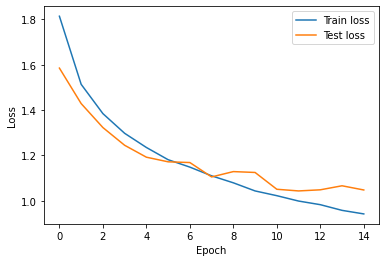

In [55]:
# loss, accuracy 추이 확인 with plt.plot

plt.plot(range(num_epoch), seq_train_loss, label="Train loss")
plt.plot(range(num_epoch), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

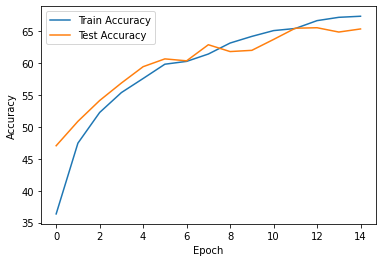

In [56]:
plt.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

#### 결과물 총평

* 최종 Test Accuracy: 65.31% (Epoch 15)
* 최고 Test Accuracy: 65.50% (Epoch 13)
* Epoch 8 즈음 Overfitting이 일어나는 듯 Test Accuracy가 정체를 보였으나 Epoch 10 이후 소폭 반등함
* 그러나 Epoch 12 이후로는 계속 65%대의 정확도에서 올라가지 못하는 것으로 보아, Overfitting이 발생했다고 추측할 수 있음

<해결책>

* Epoch 수를 늘려 본다: Overfitting 여부를 조금 더 확실히 확인 가능
* Hyperparameter 수정: out_channnel 수, conv2d layer 수, filter 개수 등
* 첫 input 크기 조절: 현재는 32x32로 input size를 설정했는데 이를 키운다.